## Алексеева Екатерина БЭК215 (учебная группа - 3), dap_econ_2022_201. Часть 2.

Занимательный факт о себе (2): умею собирать кубик Рубика 3х3 и леплю из глины.

### Задача 1 (Парадокс инспектора)

#### Пункт А. Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

In [136]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [137]:
# Настройка графиков
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 5),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

In [138]:
import warnings

# Отключим предпреждения
warnings.filterwarnings("ignore")

In [139]:
start_time = 480 # время начала работы автостанции в минутах (8:00)

time_work = 12*60 # Время работы автостанции в минутах

end_time = 1200 # время окончания работы автостанции в минутах (20:00)

num_experiments = 10000 # количество экспериментов

In [140]:
# Массив для количества автобусов в каждом эксперименте
num_buses = []
# количество пассажиров на автобусе для каждого автобуса для каждого эксперимента
passenger_counts = []
# генерируем список моментов отхода автобусов
departure_times = []

# Установим зерно
np.random.seed(0)
# Выполняем num_experiments экспериментов
for i in range(num_experiments):
    # Начинаем с первого автобуса
    bus_time = start_time
    # Счетчик автобусов
    count_buses = 0
    # Список хранения пассажиров в один день
    passenger_num = []
    # генерируем список моментов отхода автобусов
    departure_times_day = [0]
    # Генерируем интервалы между автобусами до тех пор, пока не уйдет последний автобус
    while bus_time < end_time:
        # Генерируем случайный интервал между 5-ю и 10-ю минутами
        interval = 5*random.randint(1, 2)
        # Добавляем интервал к времени прибытия автобуса
        bus_time += interval
        # Увеличиваем счетчик автобусов
        count_buses += 1
        # Добавляем
        departure_times_day.append(bus_time)
        # Добавлем
        passenger_num.append(5*random.randint(1, 2))
    # Дбавляем в общий массив времен автобусов
    departure_times.append(np.array(departure_times_day))
    # Дбавляем в общий массив пассажиров
    passenger_counts.append(np.array(passenger_num))
    # Добавляем количество автобусов в массив
    num_buses.append(count_buses)

passenger_counts = np.array(passenger_counts)
departure_times = np.array(departure_times)

Для каждого эксперимента будем генерировать случайные интервалы между автобусами и определять время, когда каждый автобус отойдет от автостанции. Для этого будем использовать функцию np.cumsum, которая возвращает массив, элементы которого равны сумме всех предыдущих элементов.

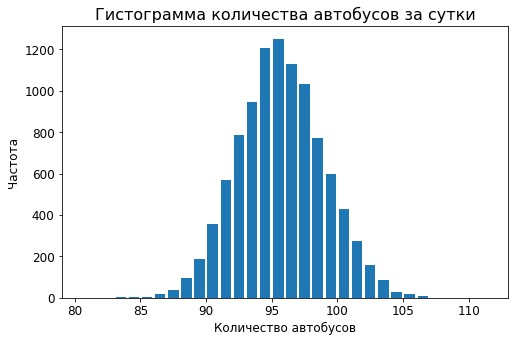

In [141]:
# Строим гистограмму количества автобусов
hist, bin_edges = np.histogram(num_buses, bins=np.arange(max(num_buses)+1)-0.5)

plt.bar(bin_edges[:-1], hist)

# Добавляем заголовок и метки осей
plt.title("Гистограмма количества автобусов за сутки")
plt.xlabel("Количество автобусов")
plt.ylabel("Частота")

# Добавим промежутки для лучшего отображения графика и удобства
plt.xlim([min(num_buses)-5, max(num_buses)+5])
# Отображаем график
plt.show()

**ВЫВОД:** Гистограмма имеет форму, близкую к нормальному распределению, без ярко выраженных хвостов, что может говорить об отсутствии выбросов.

#### Пункт Б. Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

In [142]:
# Кол-во пассажиров на автобусе
passengers_on_random_bus = []

for i in passenger_counts:
    
  # Случайно выбираем автобус, добавляем в общий список
    passengers_on_random_bus.append(random.choice(i))

In [143]:
# выводим математическое ожидание и дисперсию
print('Математическое ожидание: ', np.mean(passengers_on_random_bus))
print('Дисперсия: ', np.var(passengers_on_random_bus))

Математическое ожидание:  7.525
Дисперсия:  6.249375


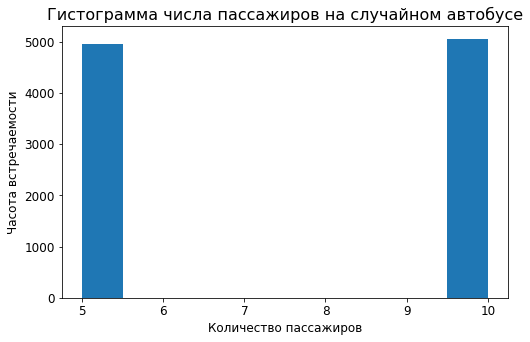

In [144]:
# строим гистограмму числа пассажиров на случайном автобусе
plt.hist(passengers_on_random_bus)

plt.xlabel('Количество пассажиров')
plt.ylabel('Часота встречаемости')
plt.title('Гистограмма числа пассажиров на случайном автобусе')

# Отображаем график
plt.show()

Эта гистограмма может быть использована для анализа того, как автобусы загружены пассажирами, и помочь в принятии решений о необходимости добавления автобусов.

Как можно заметить, автобусы часто полные (10), следовательно необходимо добавить еще автобусов

#### Пункт В. Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

In [145]:
# Храним результаты посещения автобуса
np.random.seed(1)
passengers_on_pumba_bus = []

# Тут мы итерируемся по каждой симуляции
# через zip итерируемся по двум элементам
for i, j in zip(departure_times, passenger_counts):
    # генерируем момент прибытия Пумбы на автостанцию
    pumba_arrival_time = np.random.randint(start_time, end_time)

    # находим первый автобус после момента прибытия Пумбы
    bus_index = 0
    while i[bus_index] < pumba_arrival_time:
        bus_index += 1

    if 0 <= bus_index < len(j):
        # количество пассажиров на первом автобусе после момента прибытия Пумбы
        passengers_on_pumba_bus.append(j[bus_index])
    else:
        # Если Пумба не успел ни на один автобус, добавим 0 (он не увидел пассажиров)
        passengers_on_pumba_bus.append(0)


In [146]:
# выводим математическое ожидание и дисперсию
print('Математическое ожидание: ', np.mean(passengers_on_pumba_bus))
print('Дисперсия: ', np.var(passengers_on_pumba_bus))

Математическое ожидание:  7.4445
Дисперсия:  6.606919749999999


В результате моделирования, можно заметить, что мат ожидание и дисперсия у варианта Б и В схожи, что говорит о корректности выполнении эксперимента по моделированию автобусов.

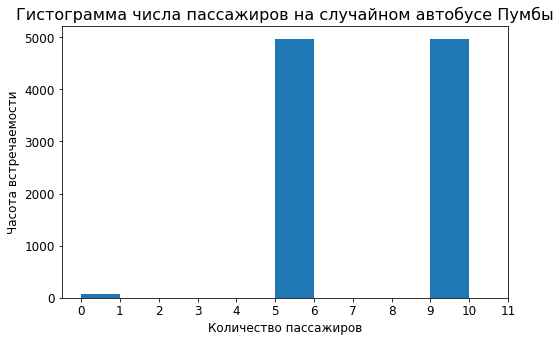

In [147]:
# строим гистограмму числа пассажиров на случайном автобусе
plt.hist(passengers_on_pumba_bus)

plt.xlabel('Количество пассажиров')
plt.ylabel('Часота встречаемости')
plt.title('Гистограмма числа пассажиров на случайном автобусе Пумбы')

# Задаем значения для промежутков
plt.xticks(np.arange(min(passengers_on_pumba_bus),
                     12, 1));

# Отображаем график
plt.show()

Эта гистограмма также может быть использована для анализа того, как автобусы загружены пассажирами, и помочь в принятии решений о необходимости добавить/убрать автобусы.

Как можно заметить, автобусы загружены на малую часть, следовательно, возможно следует убрать некоторые.

#### Пункт Г. Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

В таком случае количеств пассажиров тоже будет зависеть экспоненциально

По сравнению с предыдущим случаем, где время между автобусами было фиксированным, экспоненциальное распределение времени между автобусами средним в 10 минут означает, что вероятность того, что два автобуса отойдут друг за другом в ближайшие несколько минут, значительно меньше.

In [148]:
# Массив для количества автобусов в каждом эксперименте
num_buses = []
# количество пассажиров на автобусе для каждого автобуса для каждого эксперимента
passenger_counts = []
# генерируем список моментов отхода автобусов
departure_times = []

# Установим сид
np.random.seed(2)
# Выполняем num_experiments экспериментов
for i in range(num_experiments):
    # Начинаем с первого автобуса
    bus_time = start_time
    # Счетчик автобусов
    count_buses = 0
    # Список хранения пассажиров в один день
    passenger_num = []
    # генерируем список моментов отхода автобусов
    departure_times_day = [0]
    # Генерируем интервалы между автобусами до тех пор, пока не уйдет последний автобус
    while bus_time < end_time:
        # Экспоненциально со средним в 10 минут
        interval = np.random.exponential(scale=10)
        # Добавляем интервал к времени прибытия автобуса
        bus_time += interval
        # Увеличиваем счетчик автобусов
        count_buses += 1
        # Добавляем
        departure_times_day.append(bus_time)
        # Добавлем
        passenger_num.append(np.random.exponential(scale=10))
    # Дбавляем в общий массив времен автобусов
    departure_times.append(np.array(departure_times_day))
    # Дбавляем в общий массив пассажиров
    passenger_counts.append(np.array(passenger_num))
    # Добавляем количество автобусов в массив
    num_buses.append(count_buses)

passenger_counts = np.array(passenger_counts)
departure_times = np.array(departure_times)

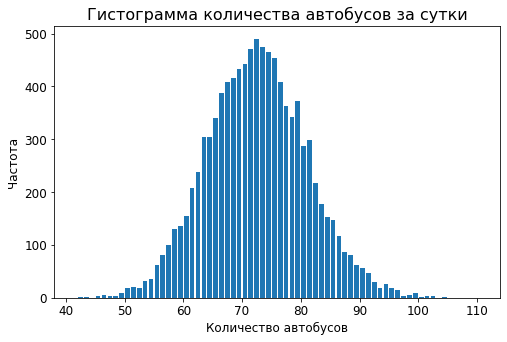

In [149]:
# Строим гистограмму количества автобусов
hist, bin_edges = np.histogram(num_buses, bins=np.arange(max(num_buses)+1)-0.5)

plt.bar(bin_edges[:-1], hist)

# Добавляем заголовок и метки осей
plt.title("Гистограмма количества автобусов за сутки")
plt.xlabel("Количество автобусов")
plt.ylabel("Частота")

plt.xlim([min(num_buses)-5, max(num_buses)+5])
# Отображаем график
plt.show()

Видим, что количество автобусов теперь разнится по сравнению с первым графиком.

Также можно заметить более ярко выраженные хвосты, которые говорят о наличии слишком большого или слишком малого числа автобусов в сутках

In [150]:
# Храним рандомных пассажиров
passengers_on_random_bus = []

for i in passenger_counts:
  # Случайно выбираем автобус, добавляем в общий список
  passengers_on_random_bus.append(random.choice(i))

print('Математическое ожидание: ', np.mean(passengers_on_random_bus))
print('Дисперсия: ', np.var(passengers_on_random_bus))

Математическое ожидание:  10.07344143985262
Дисперсия:  104.39288942962473


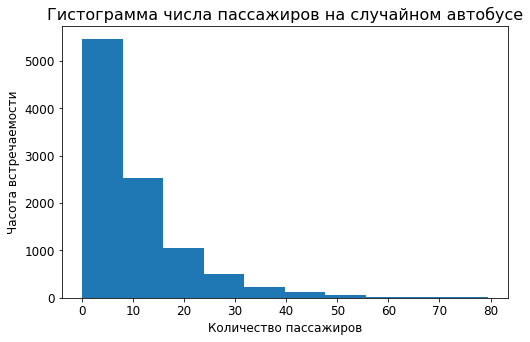

In [151]:
# строим гистограмму числа пассажиров на случайном автобусе
plt.hist(passengers_on_random_bus)

plt.xlabel('Количество пассажиров')
plt.ylabel('Часота встречаемости')
plt.title('Гистограмма числа пассажиров на случайном автобусе')

# Задаем значения для промежутков
plt.xticks(np.arange(min(passengers_on_random_bus),
                     max(passengers_on_random_bus)+1, 10));

# Отображаем график
plt.show()

In [152]:
# Храним результаты посещения автобуса
passengers_on_pumba_bus = []

# Тут мы итерируемся по каждой симуляции
# через zip итерируемся по двум элементам
for i, j in zip(departure_times, passenger_counts):
    # генерируем момент прибытия Пумбы на автостанцию
    pumba_arrival_time = np.random.randint(start_time, end_time)

    # находим первый автобус после момента прибытия Пумбы
    bus_index = 0
    while i[bus_index] < pumba_arrival_time:
        bus_index += 1

    if 0 <= bus_index < len(j):
        # количество пассажиров на первом автобусе после момента прибытия Пумбы
        passengers_on_pumba_bus.append(j[bus_index])
    else:
        # Если Пумба не успел ни на один автобус, добавим 0 (он не увидел пассажиров)
        passengers_on_pumba_bus.append(0)

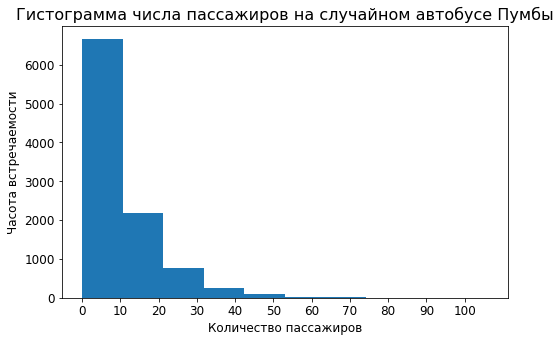

In [153]:
# строим гистограмму числа пассажиров на случайном автобусе
plt.hist(passengers_on_pumba_bus)

plt.xlabel('Количество пассажиров')
plt.ylabel('Часота встречаемости')
plt.title('Гистограмма числа пассажиров на случайном автобусе Пумбы')

# Задаем значения для промежутков
plt.xticks(np.arange(min(passengers_on_pumba_bus),
                     max(passengers_on_pumba_bus), 10));

# Отображаем график
plt.show()

Исходя из графиков, можем сделать вывод, что теперь автобусы могут приходить реже, т.к. видим большое количество пассажиров до 10 человек, что говорит о переизбытке автобусов

### Задача 2 (Парадокс Хуана Мануэля Родригеса Паррондо)

In [154]:
# Начальные параметры игроков 
atos_start = 1000
portos_start = 1000
aramis_start = 1000

In [155]:
# функции для определения выигрыша/проигрыша в казино
def atos_win():
    """
    Возвращает значение Bool, где случайное значение будет True, если
    меньше 0.49
    """
    return random.random() < 0.49

In [156]:
def portos_win(portos_money):
    """
    Возвращает значение Bool, где случайное значение будет True, если
    меньше условия
    """
    if portos_money % 3 == 0:
        # Если богатство кратно трем
        return random.random() < 0.09
    return random.random() < 0.74

In [157]:
# функция для определения выбора казино Арамисом
def choose_casino():
    """
    Возвращает случаный выбор казино А или B
    """
    return random.choice(['A', 'B'])

In [158]:
# функция для симуляции 1 эксперимента
def simulate_experiment():
    # Создадим массивы хранений богатсва персонажей
    atos_money = [atos_start]
    portos_money = [portos_start]
    aramis_money = [aramis_start]
    for i in range(1, 1001):
        # Атос играет в казино A
        if atos_win():
            atos_money.append(atos_money[-1] + 1)
        else:
            atos_money.append(atos_money[-1] - 1)
        # Портос играет в казино B
        if portos_win(portos_money[-1]):
            portos_money.append(portos_money[-1] + 1)
        else:
            portos_money.append(portos_money[-1] - 1)
        # Арамис выбирает казино
        if choose_casino() == 'A':
            if atos_win():
                aramis_money.append(aramis_money[-1] + 1)
            else:
                aramis_money.append(aramis_money[-1] - 1)
        else:
            if portos_win(portos_money[-1]):
                aramis_money.append(aramis_money[-1] + 1)
            else:
                aramis_money.append(aramis_money[-1] - 1)
    return atos_money, portos_money, aramis_money

In [160]:
# симуляция 10000 экспериментов
np.random.seed(5)
atos_all = []
portos_all = []
aramis_all = []
for i in range(10000):
    # Получим массив массивов в результате
    atos, portos, aramis = simulate_experiment()
    atos_all.append(atos)
    portos_all.append(portos)
    aramis_all.append(aramis)

In [161]:
# усредненные траектории богатства
atos_mean = np.mean(atos_all, axis=0)
portos_mean = np.mean(portos_all, axis=0)
aramis_mean = np.mean(aramis_all, axis=0)

In [162]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
          'figure.figsize': (15, 5),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

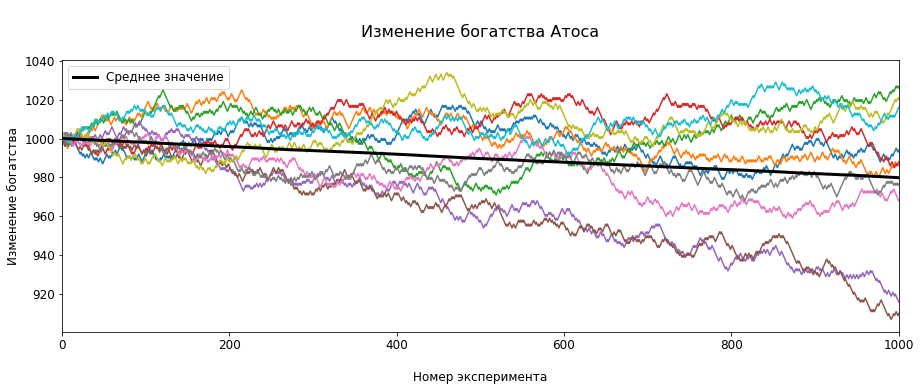

In [163]:
# Пункт А
np.random.seed(6)
for i in np.random.randint(low=0, high=9999, size=10):
    plt.plot(atos_all[i])
plt.plot(atos_mean, label='Среднее значение', linewidth=3, color='black');

plt.title('\nИзменение богатства Атоса\n')
plt.xlabel('\nНомер эксперимента')
plt.ylabel('Изменение богатства')
plt.xlim([0, 1000])
plt.legend();

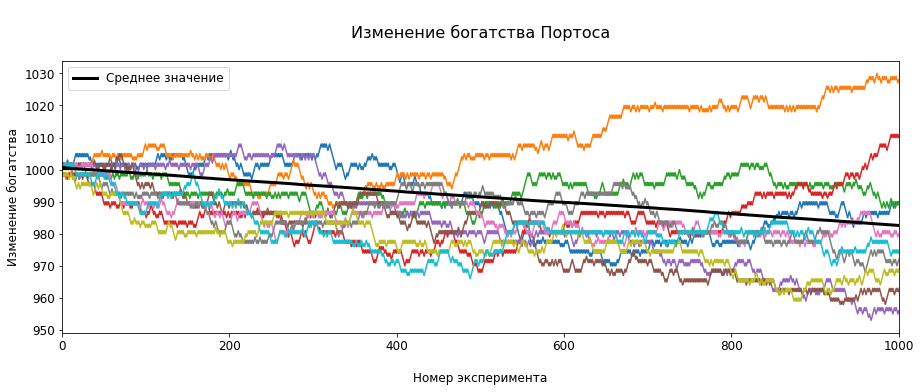

In [164]:
# Пункт Б
np.random.seed(0)
for i in np.random.randint(low=0, high=9999, size=10):
    plt.plot(portos_all[i])
plt.plot(portos_mean, label='Среднее значение', linewidth=3, color='black');

plt.title('\nИзменение богатства Портоса\n')
plt.xlabel('\nНомер эксперимента')
plt.ylabel('Изменение богатства')
plt.xlim([0, 1000])
plt.legend();

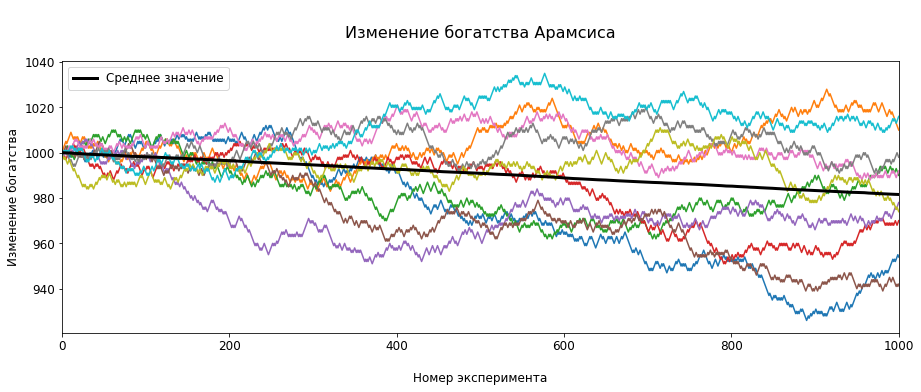

In [165]:
# Пункт В
np.random.seed(0)
for i in np.random.randint(low=0, high=9999, size=10):
    plt.plot(aramis_all[i])
plt.plot(aramis_mean, label='Среднее значение', linewidth=3, color='black');

plt.title('\nИзменение богатства Арамсиса\n')
plt.xlabel('\nНомер эксперимента')
plt.ylabel('Изменение богатства')
plt.xlim([0, 1000])
plt.legend();

Из графиков видно, что средние значения богатсва у трех персонажей снижается, из чего можем сделать вывод, что играть в казино - вредно для бюджета.

Также можно заметить, что в некоторых случаях богатство персонажей увеличилось, что говорит о некоторой вероятности повысить свое состояние.

### Задача 3 (Парадокс Берксона)

In [166]:
# Настроим графики
params = {'legend.fontsize': 12,
          'figure.figsize': (8, 5),
          'axes.labelsize': 12,
          'axes.titlesize':16,
          'xtick.labelsize':12,
          'ytick.labelsize':12}
pylab.rcParams.update(params)

In [167]:
# необходимые параметры для нормального распределения
mu = 60
sigma = 10

#### Пункт А. Постройте график числа прошедших в УШЭ в зависимости от n.

In [168]:
def simulate_students(p):
    # Перед каждым вызовом функции установим сид
    np.random.seed(0)
    # Создадим нормальное распределение
    results = np.random.normal(mu, sigma, size=(10000, 2))
    # Посчитаем сумму прошедших людей
    passed = np.sum(np.sum(results, axis=1) > p)
    return passed

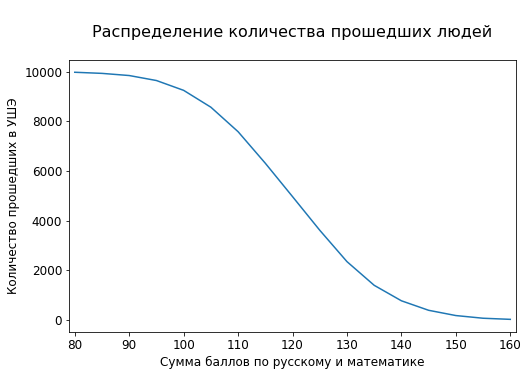

In [169]:
passed_counts = [simulate_students(p) for p in range(80, 161, 5)]
plt.plot(range(80, 161, 5), passed_counts)
plt.title('\nРаспределение количества прошедших людей\n')
plt.xlabel('Сумма баллов по русскому и математике')
plt.ylabel('Количество прошедших в УШЭ')
plt.xlim([79, 161])
plt.show()

Из графика видно, что количество прошедших студентов на экзамене в УШЭ уменьшается с увеличением порогового значения суммы баллов, что является логичным результатом.

Также можно заметить, что график имеет плавный вид, что говорит о том, что количество прошедших студентов изменяется непрерывно в зависимости от порогового значения суммы баллов.

#### Пункт Б. Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от n среди прошедших в УШЭ.

In [170]:
def simulate_correlation(p):
    np.random.seed(0)
    # Создадим нормальное распрделение для 10000 человек и 2 предметов
    results = np.random.normal(mu, sigma, size=(10000, 2))
    # Посчитаем количество учеников, которые прошли порог
    passed = np.sum(np.sum(results, axis=1) > p)
    # Если все не сдали, вернем NaN
    if passed == 0:
        return np.nan
    # Иначе возьмем тех, кто сдал
    passed_results = results[np.sum(results, axis=1) > p]
    return np.corrcoef(passed_results[:, 0], passed_results[:, 1])[0, 1]

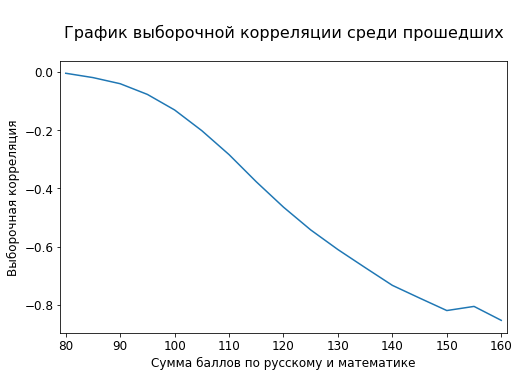

In [171]:
correlations = [simulate_correlation(p) for p in range(80, 161, 5)]
plt.plot(range(80, 161, 5), correlations)
plt.title('\nГрафик выборочной корреляции среди прошедших\n')
plt.xlabel('Сумма баллов по русскому и математике')
plt.ylabel('Выборочная корреляция')
plt.xlim([79, 161])
plt.show()

Из графика видно, что выборочная корреляция между баллами по русскому и математике у прошедших студентов имеет четкую зависимость от порогового значения суммы баллов.

Это может говорить о том, что на экзамене в УШЭ наблюдается зависимость между баллами по разным предметам у прошедших студентов.

#### Пункт В. Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от n среди не прошедших в УШЭ.

In [172]:
def simulate_non_passed_correlation(p):
    """
    Функция вычисления корреляции среди несдавших
    """
    np.random.seed(0)
    # Создадим нормальное распрделение для 10000 человек и 2 предметов
    results = np.random.normal(mu, sigma, size=(10000, 2))
    # Посчитаем количество учеников, которые не прошли порог
    non_passed = np.sum(np.sum(results, axis=1) < p)
    # Если все сдали, вернем NaN
    if non_passed == 0:
        return np.nan
    # Иначе возьмем тех, кто не сдал
    passed_results = results[np.sum(results, axis=1) < p]
    return np.corrcoef(passed_results[:, 0], passed_results[:, 1])[0, 1]

In [173]:
simulate_non_passed_correlation(100)

-0.7110121516499646

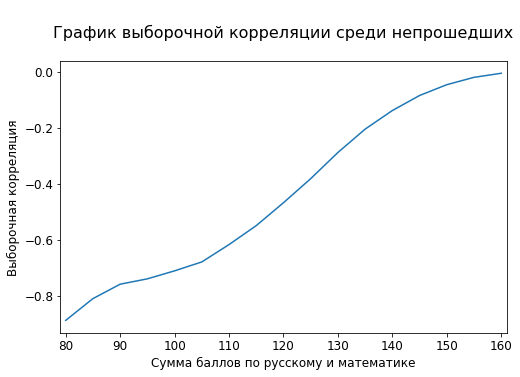

In [174]:
correlations = [simulate_non_passed_correlation(p) for p in range(80, 161, 5)]
plt.plot(range(80, 161, 5), correlations)
plt.title('\nГрафик выборочной корреляции среди непрошедших\n')
plt.xlabel('Сумма баллов по русскому и математике')
plt.ylabel('Выборочная корреляция')
plt.xlim([79, 161])
plt.show()

Из графика видно, что выборочная корреляция между баллами по русскому и математике у непрошедших студентов с ростом порогового значения суммы баллов стремится к 0.

Это может говорить о том, что на экзамене в УШЭ не наблюдается зависимость между баллами по разным предметам у непрошедших студентов.

Прикрепите фотографию того, как вы начали этот февраль. 

<img src="photo1677348454.jpeg" width="300"/> <img src="photo1677348314.jpeg" width="300"/>   

Какую самую классную эмоцию вы испытали за прошедший месяц?

Спокойствие. Его было мало, но оно было прекрасным.